In [8]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import gym
import numpy as np
import random
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### **Initialize environment**

In [2]:
env = gym.make("Taxi-v3").env

##### **Q-agent**

In [5]:
# No need to copy paste the same QAgent
# definition in every notebook, don't you think?
from src.q_agent import QAgent

# hyper-parameters
# RL problems are full of these hyper-parameters.
# For the moment, trust me when I set these values.
# We will later play with these and see how they impact learning.
alphas = [0.01, 0.1, 1]
gammas = [0.1, 0.6, 0.9]

##### **Training loop**

In [6]:
import pandas as pd

from src.loops import train

# exploration vs exploitation prob
# let's start with a constant probability of 10%.
epsilon = 0.1
n_episodes = 1000

results = pd.DataFrame()
for alpha in alphas:
    for gamma in gammas:
        
        print(f'alpha: {alpha}, gamma: {gamma}')
        agent = QAgent(env, alpha, gamma)
        
        _, timesteps, penalties = train(agent,
                                        env,
                                        n_episodes,
                                        epsilon)
        
        # collect timesteps and penalties for this pair
        # of hyper-parameters (alpha, gamma)
        results_ = pd.DataFrame()
        results_['timesteps'] = timesteps
        results_['penalties'] = penalties
        results_['alpha'] = alpha
        results_['gamma'] = gamma
        results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(
    columns={'index': 'episode'})

# add column with the 2 hyper-parameters
results['hyperparameters'] = [
    f'alpha={a}, gamma={g}'
    for (a, g) in zip(results['alpha'], results['gamma'])
]

alpha: 0.01, gamma: 0.1


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.08it/s]


alpha: 0.01, gamma: 0.6


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.26it/s]


alpha: 0.01, gamma: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 135.10it/s]


alpha: 0.1, gamma: 0.1


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 216.47it/s]


alpha: 0.1, gamma: 0.6


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 464.27it/s]


alpha: 0.1, gamma: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 613.15it/s]


alpha: 1, gamma: 0.1


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1617.81it/s]


alpha: 1, gamma: 0.6


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1834.72it/s]


alpha: 1, gamma: 0.9


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1644.33it/s]


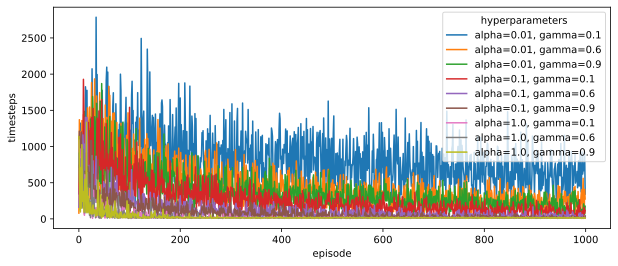

In [13]:
fig = plt.gcf()
fig.set_size_inches(10, 4)
sns.lineplot(x='episode', y='timesteps',
             hue='hyperparameters', data=results);

##### **Discarding alpha=0.01**

In [14]:
from src.loops import train_many_runs

alphas = [0.1, 1]
gammas = [0.1, 0.6, 0.9]

epsilon = 0.1
n_episodes = 1000
n_runs = 10

results = pd.DataFrame()
for alpha in alphas:
    for gamma in gammas:
        
        print(f'alpha: {alpha}, gamma: {gamma}')
        agent = QAgent(env, alpha, gamma)
        
        timesteps, penalties = train_many_runs(agent,
                                               env,
                                               n_episodes,
                                               epsilon,
                                               n_runs)
        
        # collect timesteps and penalties for this pair of
        # hyper-parameters (alpha, gamma)
        results_ = pd.DataFrame()
        results_['timesteps'] = timesteps
        results_['penalties'] = penalties
        results_['alpha'] = alpha
        results_['gamma'] = gamma
        results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(
    columns={'index': 'episode'})

results['hyperparameters'] = [
    f'alpha={a}, gamma={g}'
    for (a, g) in zip(results['alpha'], results['gamma'])]

alpha: 0.1, gamma: 0.1


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 222.91it/s]


alpha: 0.1, gamma: 0.6


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 456.63it/s]


alpha: 0.1, gamma: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 514.07it/s]


alpha: 1, gamma: 0.1


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1151.09it/s]


alpha: 1, gamma: 0.6


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1240.02it/s]


alpha: 1, gamma: 0.9


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1668.58it/s]


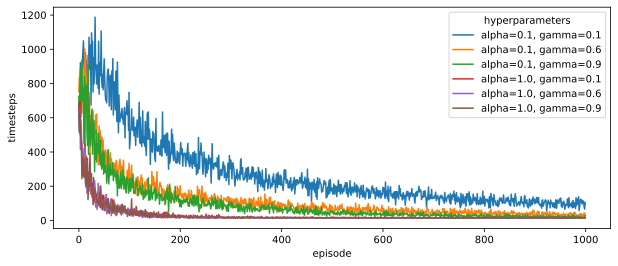

In [17]:
fig = plt.gcf()
fig.set_size_inches(10, 4)
sns.lineplot(x='episode', y='timesteps', hue='hyperparameters', data=results);

##### **Is the current value of 10% the best?**

In [18]:
What about epsilon? Is the current value of 10% the best?
# best hyper-parameters so far
alpha = 1.0
gamma = 0.9

epsilons = [0.01, 0.10, 0.9]
n_runs = 10
n_episodes = 200

results = pd.DataFrame()
for epsilon in epsilons:
        
    print(f'epsilon: {epsilon}')
    agent = QAgent(env, alpha, gamma)

    timesteps, penalties = train_many_runs(agent,
                                           env,
                                           n_episodes,
                                           epsilon,
                                           n_runs)

    # collect timesteps and penalties for this pair of
    # hyper-parameters (alpha, gamma)
    results_ = pd.DataFrame()
    results_['timesteps'] = timesteps
    results_['penalties'] = penalties
    results_['epsilon'] = epsilon
    results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(columns={'index': 'episode'})

Object `best` not found.
epsilon: 0.01


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 388.69it/s]


epsilon: 0.1


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 356.72it/s]


epsilon: 0.9


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 99.28it/s]


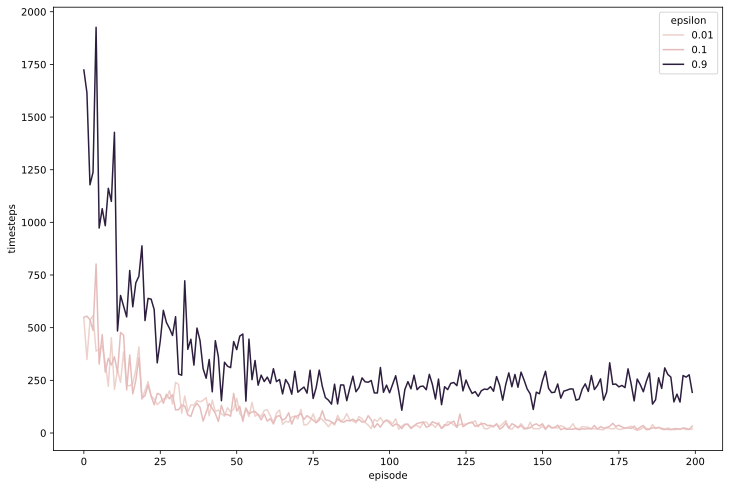

<AxesSubplot:xlabel='episode', ylabel='penalties'>

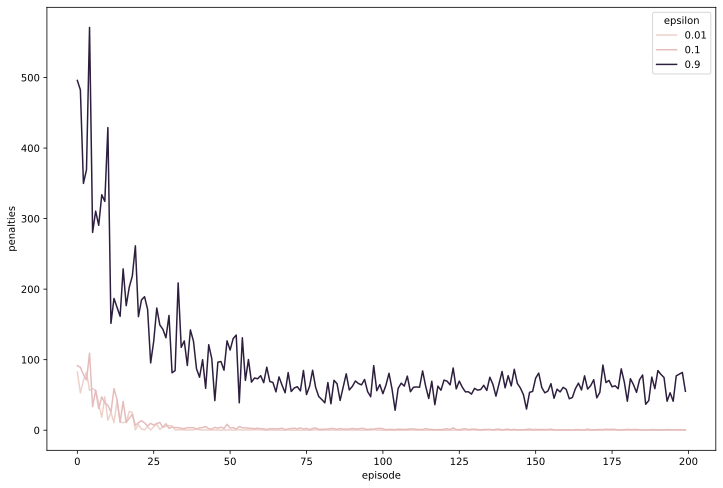

In [19]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.lineplot(x='episode', y='timesteps', hue='epsilon', data=results)
plt.show()

fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.lineplot(x='episode', y='penalties', hue='epsilon', data=results)